# Time series forecasting with covid-19 cases in France

In [1]:
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from lstm import LstmNeuralNetwork
from processing import *

We load the covid-19 data from France

In [2]:
covid_data = pd.read_csv('data/covid_data.csv')
covid_data = covid_data.loc[covid_data['Country'] == 'France']
covid_data = covid_data[['Confirmed']]
covid_data.tail()

,Confirmed
38866,6989613
38867,6994319
38868,6995628
38869,7002393
38870,7008228


<AxesSubplot:>

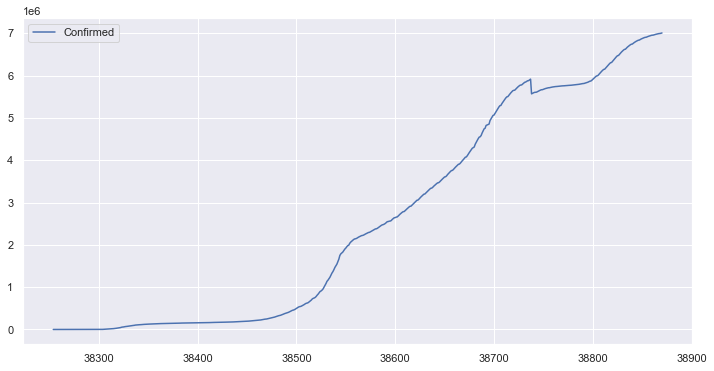

In [4]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.lineplot(
    data = covid_data
)

We process our time series : differencing + 3 days moving average + 15 days sliding window

In [5]:
seq_length = 15
average_size = 3
train_proportion = 2/3
scaler4 = MinMaxScaler(feature_range=(-1, 1))
y_raw4, X_data4, y_data4, X_train4, y_train4, X_test4, y_test4 = process_data_diff(covid_data, seq_length, average_size, train_proportion, scaler4)

In [6]:
my_model4 = LstmNeuralNetwork(input_size = 1, num_layers = 2, hidden_size = 21, seq_length = seq_length)

In [11]:
num_epochs = 1000
learning_rate = 0.001
criterion = nn.MSELoss()
my_model4._train(num_epochs, learning_rate, criterion, X_train4, y_train4, X_test4, y_test4)

Epoch: 1000, Train loss: 0.00011, Test loss: 0.09448: 100%|██████████| 1001/1001 [00:35<00:00, 28.48it/s]


In [13]:
filepath4 = 'save/model4'
torch.save(my_model4.state_dict(), filepath4)

In [12]:
filepath4 = 'save/model4'
my_model4.load_state_dict(torch.load(filepath4))

<All keys matched successfully>

<Figure size 864x432 with 0 Axes>

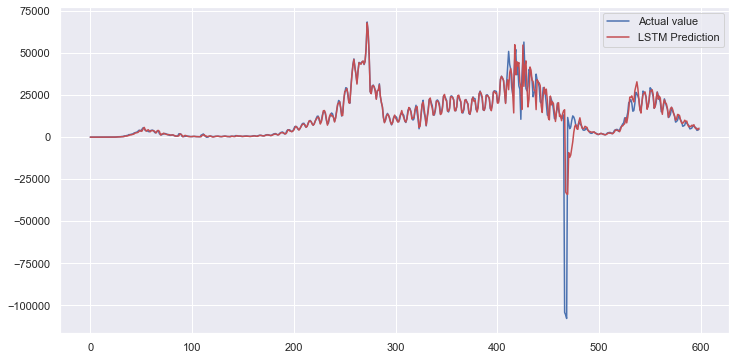

In [8]:
plt.clf()
plt.figure(figsize=(12,6))
my_model4.plot(X_data4, y_data4, scaler4)

<Figure size 864x432 with 0 Axes>

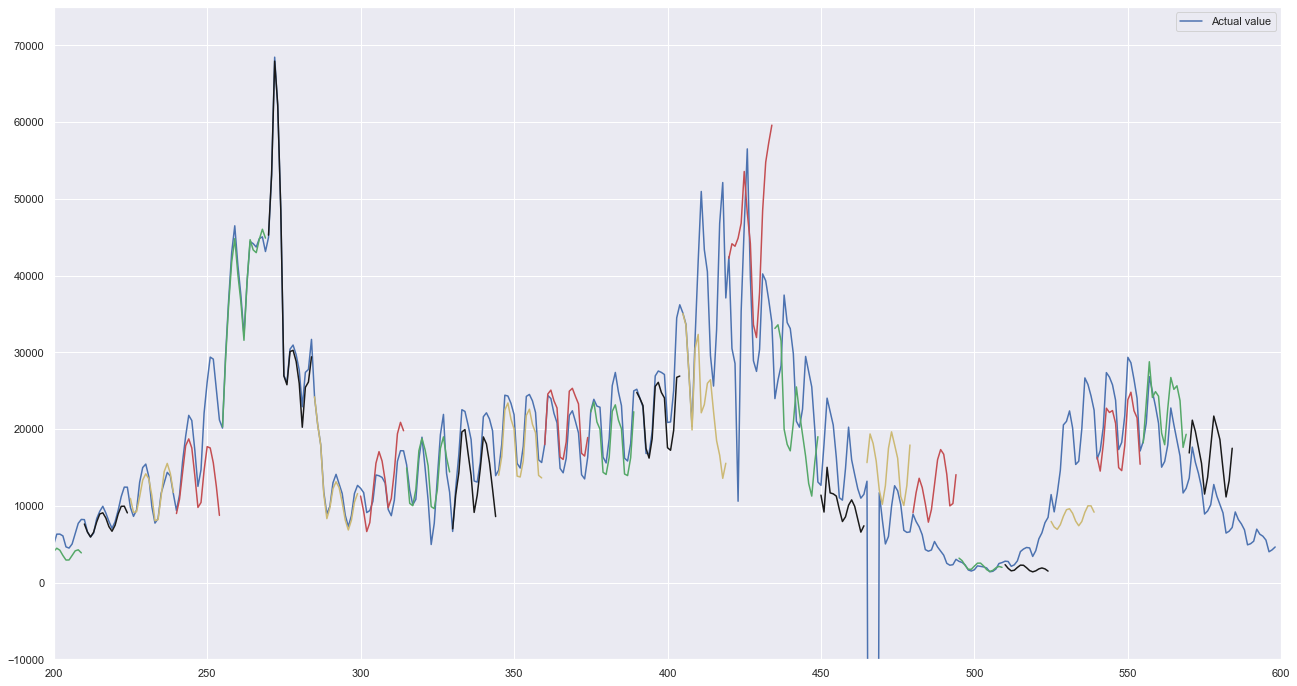

In [9]:
horizon = 15
drawing_jump = 15
plt.clf()
plt.figure(figsize=(22,12))
plt.axis([200, 600, -10000, 75000])
my_model4.plot_with_horizon(X_data4, y_data4, scaler4, horizon, drawing_jump)

In [10]:
last_day = y_data4.shape[0]
horizon_1 = 1
horizon_2 = 7
horizon_3 = 15
naive_prediction_without_horizon4 = np.zeros(last_day)
print('Model accuracy with horizon = 1: \n')
my_model4.get_accuracy_with_horizon(X_data4, y_data4, naive_prediction_without_horizon4, scaler4, last_day, horizon_1)
print('\nModel accuracy with horizon = 7: \n')
my_model4.get_accuracy_with_horizon(X_data4, y_data4, naive_prediction_without_horizon4, scaler4, last_day, horizon_2)
print('\nModel accuracy with horizon = 15: \n')
my_model4.get_accuracy_with_horizon(X_data4, y_data4, naive_prediction_without_horizon4, scaler4, last_day, horizon_3)

Model accuracy with horizon = 1: 

Mean squared error up to the 599 day using the naive prediction : 356789634.5978947
Mean squared error up to the 599 day using the lstm prediction : 57304908.824564785
R2 up to the 599 day using the naive prediction : -0.6207198711709523
R2 up to the 599 day using the lstm prediction : 0.7396919768919772

Model accuracy with horizon = 7: 

Mean squared error up to the 599 day using the naive prediction : 360281969.6920421
Mean squared error up to the 599 day using the lstm prediction : 107023304.61249377
R2 up to the 599 day using the naive prediction : -0.6271059104118122
R2 up to the 599 day using the lstm prediction : 0.5166612094531393

Model accuracy with horizon = 15: 

Mean squared error up to the 599 day using the naive prediction : 364959351.51602685
Mean squared error up to the 599 day using the lstm prediction : 121971782.64713778
R2 up to the 599 day using the naive prediction : -0.6347817928788655
R2 up to the 599 day using the lstm predi

Interpretation :

On the plot with an horizon of 15 days, we notice that our model was able to learn the weak seasonality in the covid cases. Furthermore, we see on the $R^2$ values that our model still gets $R^2 = 0.45$ with a 15 days horizon. 